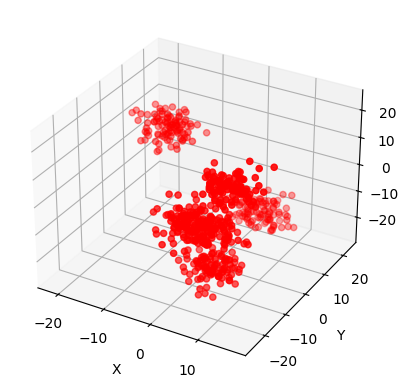

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import string
from sklearn.decomposition import PCA


def generate_cluster_centers(num_clusters, min_val, max_val):
    cluster_centers = np.random.uniform(min_val, max_val, size=(num_clusters, 3))
    return cluster_centers

def generate_cluster_data(cluster_centers, total_points, mean_distance, std_dev_distance, cluster_label_set=None):
    cluster_data = []
    labels = []
    for ix, center in enumerate(cluster_centers):
        points = np.random.normal(loc=center, scale=std_dev_distance, size=(total_points, 3))
        labels.extend([cluster_label_set[ix]] * total_points)
        cluster_data.append(points)
    return np.concatenate(cluster_data), labels

def generate_cluster_labels(num_clusters):
    alphabet = string.ascii_uppercase
    labels = []
    for i in range(num_clusters):
        if i < 26:
            label = alphabet[i]
        else:
            label = f"{alphabet[i % 26]}{i // 26}"
        labels.extend([label] )
    return labels



num_clusters = 6
min_val = -20   # min and max values for the cluster centers
max_val = 20
total_points = 100
mean_distance = 9.0
std_dev_distance = 3

# Generate cluster labels
cluster_label_set = generate_cluster_labels(num_clusters)
cluster_centers = generate_cluster_centers(num_clusters, min_val, max_val)
cluster_data, cluster_labels = generate_cluster_data(cluster_centers, total_points, mean_distance, std_dev_distance, cluster_label_set)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


# Attach cluster labels to each datapoint
labeled_cluster_data = np.column_stack((cluster_data, cluster_labels))
raw_data = np.copy(cluster_data)


In [3]:
raw_data.shape

(600, 3)

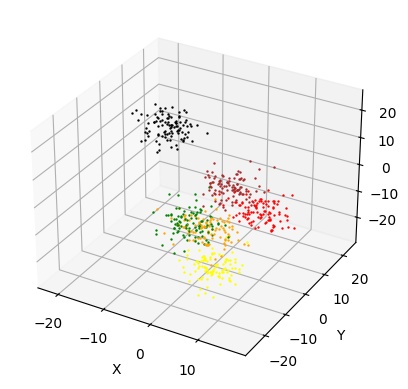

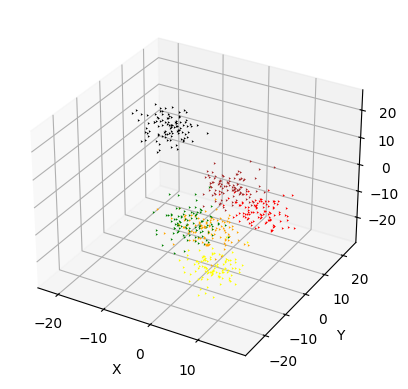

In [4]:
import matplotlib.pyplot as plt

# Define the resistor color code colors
colors = ['black', 'brown', 'red', 'orange', 'yellow', 'green', 'blue', 'violet', 'gray', 'white']

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign a unique color to each cluster
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels)
color_map = dict(zip(unique_labels, colors[:num_clusters]))

# Plot each data point with its corresponding cluster color
for i, label in enumerate(cluster_labels):
    ax.scatter(cluster_data[i, 0], cluster_data[i, 1], cluster_data[i, 2], c=color_map[label], marker='o', s=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each data point with its corresponding cluster color
for i, label in enumerate(cluster_labels):
    ax.scatter(raw_data[i, 0], raw_data[i, 1], raw_data[i, 2], c=color_map[label], marker='3', s=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()




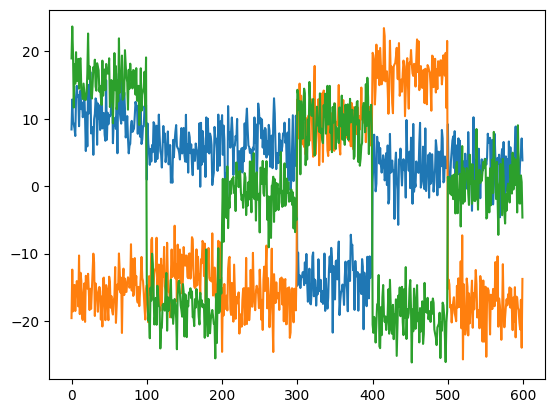

In [5]:
plt.plot(raw_data[...,0])
plt.plot(raw_data[...,1])
plt.plot(raw_data[...,2])
plt.show()


AttributeError: Poly3DCollection.set() got an unexpected keyword argument 's'

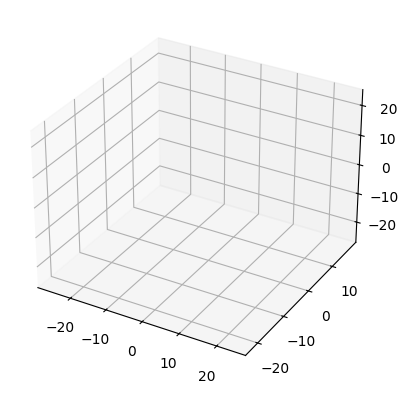

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Set the size of the grid
grid_size = 0.5

# Create the grid
x_min_val = np.min(raw_data[...,0])
y_min_val = np.min(raw_data[...,1])
z_min_val = np.min(raw_data[...,2])

x_max_val = np.max(raw_data[...,0])  
y_max_val = np.max(raw_data[...,1])
z_max_val = np.max(raw_data[...,2])

x_span = x_max_val - x_min_val
y_span = y_max_val - y_min_val
z_span = z_max_val - z_min_val

x = np.arange(x_min_val, x_max_val, grid_size)
#add one element to the end of the array to make sure we include the last value
x=np.append(x,[x_max_val+grid_size])

y = np.arange(y_min_val, y_max_val, grid_size)
y=np.append(y,[y_max_val+grid_size])

z = np.arange(z_min_val, z_max_val, grid_size)
z=np.append(z,[z_max_val+grid_size])

#generate a 3 dimensional grid using x, y, z
X, Y, Z = np.meshgrid(y, x, z, indexing='xy')

# Create the volumetric grid
grid = np.zeros_like(X)

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Assign values to the grid based on the cluster labels
for i, label in enumerate(cluster_labels):
    if i < cluster_data.shape[0]:
        xi = int(grid.shape[0]*((raw_data[i][0] - x_min_val) / x_span))-1
        yi = int(grid.shape[1]*((raw_data[i][1] - y_min_val) / y_span))-1
        zi = int(grid.shape[2]*((raw_data[i][2] - z_min_val) / z_span))-1
        grid[xi, yi, zi] += 1

# Plot the volumetric grid
ax.voxels(X, Y, Z, np.resize(grid, np.array(grid.shape)-1), edgecolor='k', s=np.array(grid.shape)-1)

# Plot each data point with its corresponding cluster color
#for i, label in enumerate(cluster_labels):
#    if i < cluster_data.shape[0]:
#        ax.scatter(cluster_data[i, 0], cluster_data[i, 1], cluster_data[i, 2], c=color_map[label], marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


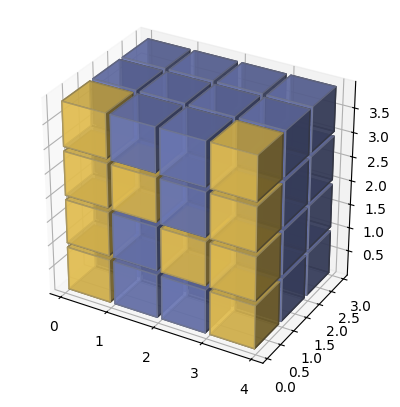

In [ ]:
"""
===============================
3D voxel plot of the NumPy logo
===============================

Demonstrates using `.Axes3D.voxels` with uneven coordinates.
"""

import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()
